In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statsmodels.api as sm
import pandas.util.testing as tm

In [4]:
x = [7.01, 7.11, 7.12, 7.24, 7.94, 7.94, 8.04, 8.05, 8.07, 8.90, 8.94, 8.95, 8.97, 8.98, 9.85, 9.86, 9.86, 9.87]
y= [60, 67 , 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]

In [21]:
df = pd.DataFrame(data={'pH': x, '% arsênio removido':y})
df

,pH,% arsênio removido
0,7.01,60
1,7.11,67
2,7.12,66
3,7.24,52
4,7.94,50
5,7.94,45
6,8.04,52
7,8.05,48
8,8.07,40
9,8.90,23


In [40]:
df1 = pd.DataFrame(data=df)
print(df1)
c0=df1[df1.columns[0]]
c1=df1[df1.columns[1]]
#print(c0)
#print(c1)

      pH  % arsênio removido
0   7.01                  60
1   7.11                  67
2   7.12                  66
3   7.24                  52
4   7.94                  50
5   7.94                  45
6   8.04                  52
7   8.05                  48
8   8.07                  40
9   8.90                  23
10  8.94                  20
11  8.95                  40
12  8.97                  31
13  8.98                  26
14  9.85                   9
15  9.86                  22
16  9.86                  13
17  9.87                   7


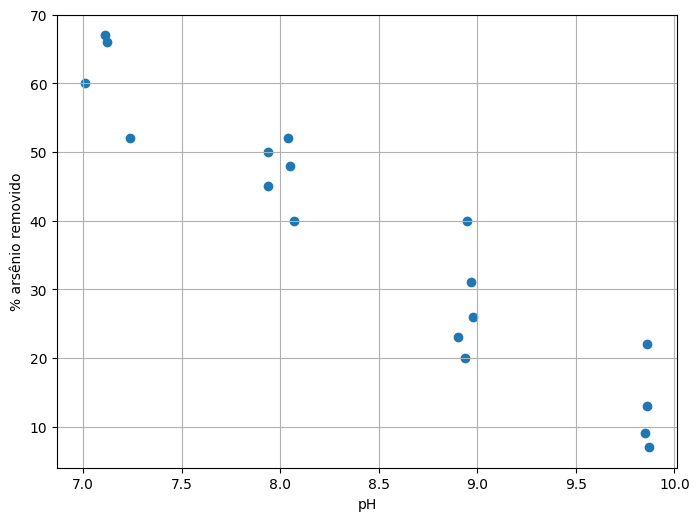

In [44]:
df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(c0,c1)
plt.xlabel(df1.columns[0]);
plt.ylabel(df1.columns[1])
plt.grid(True)
plt.show()

Estimated coefficients:
b_0 = 190.26829324780505            
b_1 = -18.034245438510087


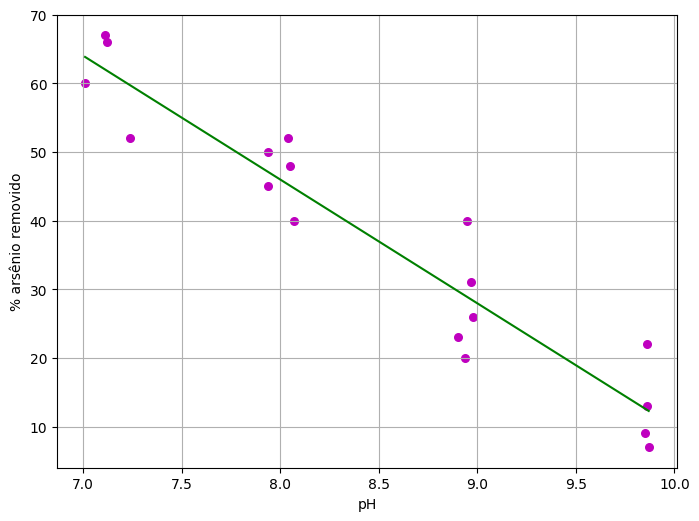

In [45]:
# fonte: Adaptado de https://github.com/OpenGenus/quark/blob/master/code/code/artificial_intelligence/src/Linear_Regression/linear_regression.py
#import numpy as np
#import matplotlib.pyplot as plt
def estimate_coef(x, y):
    # Número de amostras
    n = np.size(x)
 
    # média dos valores x e y
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # Calculo da relação cruzada e correlação de x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # Aplicar as fórmulas para obter os parÂmetros beta 0 e beta 1
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

 #criar gráfico para observar o resultado
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel(df1.columns[0])
    plt.ylabel(df1.columns[1])
 
    # function to show plot
    plt.grid(True)
    plt.show()
 
def main():
    # definir os dados (variáveis) x e y
    x= df[df1.columns[0]]  # variável preditora
    y= df[df1.columns[1]] # variável resposta  
 
 
    # estimar os coeficientes ou parâmetros
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotar a curva de regressão linear
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

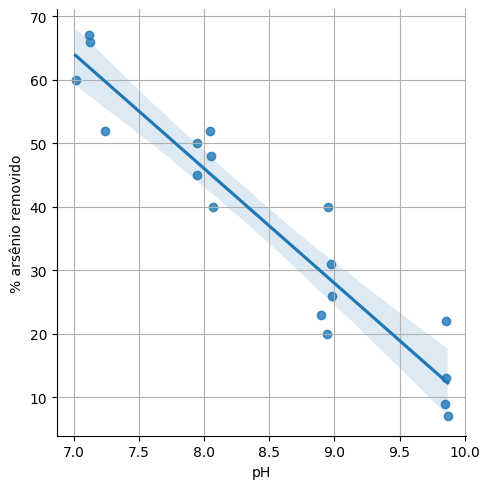

In [46]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x=df1.columns[0], y=df1.columns[1], data=df);plt.grid(True)

# Obter a equação da reta de mínimos quadrados - Opção 2 - Utilizando numpy
$y= \beta_0 + \beta_1 x_1$  

In [48]:
z = np.polyfit(x,y,1)
print('y= {0} {1}x'.format(z[1],z[0]))

y= 190.268293247797 -18.034245438509146x


# Obter a equação da reta de mínimos quadrados - Opção 3 - Utilizando API Statsmodels
$y= \beta_0 + \beta_1 x_1$  

In [49]:
x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit() #
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.55e-09
Time:                        20:28:18   Log-Likelihood:                -57.105
No. Observations:                  18   AIC:                             118.2
Df Residuals:                      16   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.2683     12.587     15.116      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [50]:
dfmo = pd.DataFrame(modelo.summary().tables[1].data)
# Select first row as column names:
dfmo.columns = dfmo.iloc[0, :]
# Select first column as row names
dfmo.index = dfmo.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
dfmo = dfmo.iloc[1:, 1:]
# Print relevant info only
print(dfmo.iloc[:,[0, 1, 4, 5]])

0            coef    std err     [0.025     0.975]
                                                  
const    190.2683     12.587    163.585    216.952
x1       -18.0342      1.474    -21.159    -14.910


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [70]:
#obter os valores esperados de y
#$\hat{y}_i=\hat{\beta_0} + \hat{\beta_1} x_i$ 
ychapeu = modelo.fittedvalues
ychapeu
dfy = pd.DataFrame(data=ychapeu)
dfy

,0
0,63.848233
1,62.044808
2,61.864466
3,59.700356
4,47.076384
5,47.076384
6,45.272960
7,45.092617
8,44.731933
9,29.763509


In [115]:
#calcular resíduos
res=ychapeu-c1
res

0      3.848233
1     -4.955192
2     -4.135534
3      7.700356
4     -2.923616
5      2.076384
6     -6.727040
7     -2.907383
8      4.731933
9      6.763509
10     9.042139
11   -11.138203
12    -2.498888
13     2.320769
14     3.630976
15    -9.549367
16    -0.549367
17     5.270291
Name: % arsênio removido, dtype: float64

In [116]:
# Calcular Quadrado dos resíduos
res2=res**2
res2

0      14.808895
1      24.553926
2      17.102644
3      59.295487
4       8.547528
5       4.311372
6      45.253068
7       8.452873
8      22.391186
9      45.745052
10     81.760278
11    124.059576
12      6.244443
13      5.385970
14     13.183984
15     91.190406
16      0.301804
17     27.775965
Name: % arsênio removido, dtype: float64

In [98]:
#@title Observar os valores em tabela
from tabulate import tabulate
df_yo = pd.DataFrame(c1).T
df_ych = pd.DataFrame(dfy).T
df_ycho = pd.DataFrame(res).T
df_ycho2 = pd.DataFrame(res2).T
table = [df_yo,df_ych,df_ycho,df_ycho2]
print(tabulate(table))

--------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  ---------  --------
60        67        66        52        50        45        52        48        40        23        20         40       31        26         9        22        13          7
63.8482   62.0448   61.8645   59.7004   47.0764   47.0764   45.273    45.0926   44.7319   29.7635   29.0421    28.8618  28.5011   28.3208   12.631    12.4506   12.4506    12.2703
 3.84823  -4.95519  -4.13553   7.70036  -2.92362   2.07638  -6.72704  -2.90738   4.73193   6.76351   9.04214  -11.1382  -2.49889   2.32077   3.63098  -9.54937  -0.549367   5.27029
14.8089   24.5539   17.1026   59.2955    8.54753   4.31137  45.2531    8.45287  22.3912   45.7451   81.7603   124.06     6.24444   5.38597  13.184    91.1904    0.301804  27.776
--------  --------  --------  --------  --------  --------  --------  --------  --------  --------  -------- 

# Calcular SQE e SQT Alternativa 1 com Numpy

In [102]:
#@title Calcular SQE e SQT Alternativa 1
#Adaptado de https://www.statology.org/sst-ssr-sse-in-python/

#calcular SQE--> Baseado nos valores esperados
sqe = np.sum((ychapeu - df1[df1.columns[1]])**2)
print("SQE=", sqe)

#calcular SQT-->Baseado nos valores observados
sqt = np.sum((c1 - (df1[df1.columns[1]].mean()))**2)
#sqt = np.sum((c1 - (c1.mean())))**2
print("SQT=", sqt)

#calcular SQR
sqr = sqt - sqe
print("SQR=",sqr)




SQE= 600.364456075747
SQT= 6217.611111111111
SQR= 5617.246655035365


# Calcular o coeficiente de determinação $r^2$

In [103]:
r2=1-sqe/sqt
print("coeficiente de determinação=",r2, "ou",r2*100, "%")

coeficiente de determinação= 0.9034412983785891 ou 90.34412983785892 %


# Calcular variância estimada $s^2$ e devio padrão estimado $s$

In [104]:
# variância estimada $s^2$ e desvio padrão estimado $s^2$
s2=sqe/(len(c1)-2)
s=pow(s2,1/2)
print('variância estimada= {0}, desvio padrão estimado= {1}'.format(s2,s))

variância estimada= 37.522778504734184, desvio padrão estimado= 6.12558393173534


# Nova alternativa para calcular as variáveis  Sxx,Sxy,Syy  e o coeficiente de correlação em uma única função.


In [105]:
#O seguinte código pode também ser usado previamente para calcular SQE, SQT, SQR e r2 (Alternativa 2)
# fonte: Adaptado de https://www.geeksforgeeks.org/sum-function-python/
def linreg(X, Y):
    """
    retorna a solução b0 e b1 para a reta y = b0 + b1x e todas as somatórias necessárias
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x           # Somatória do termos x
        Sy = Sy + y           # Somatória do termos y
        Sxx = Sxx + x*x       # Somatória do termos x^2
        Syy = Syy + y*y       # Somatória do termos y^2
        Sxy = Sxy + x*y       # Somatória do termos x vezes y
    det = Sxx * N - Sx * Sx   # variável auxiliar
    Sxxt= Sxx - Sx*Sx/N       # Termo Sxx
    Sxyt= Sxy - Sx*Sy/N       # Termo Sxy  
    Syyt= Syy - Sy*Sy/N       # Termo Syy  
    r=Sxyt/pow((Sxxt*Syyt), 1/2)
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det, Sx, Sy, Sxx,  Syy , Sxy, Sxxt, Sxyt, Syyt,r


In [95]:
#Mostrar os resultados
b1,b0,sox,soy,sox2,soy2,soxy,sxx,sxy,syy,corr = linreg(df1[df1.columns[0]],df1[df1.columns[1]])  #
print('b0= {0},b1= {1}'.format(b0,b1))
print('Somatória x= {0}, Somatória y= {1},Somatória xy= {2}'.format(sox,soy,soxy))
print('Somatória x^2= {0}, Somatória y^2= {1}'.format(sox2,soy2))
print('Sxx= {0}, Syy {1}, Sxy {2}'.format(sxx,syy,sxy))
print('r= {0}'.format(corr))

b0= 190.26829324780633,b1= -18.034245438510254
Somatória x= 152.70000000000005, Somatória y= 671.0,Somatória xy= 5380.84
Somatória x^2= 1312.6763999999998, Somatória y^2= 31231.0
Sxx= 17.27139999999895, Syy 6217.6111111111095, Sxy -311.4766666666683
r= -0.9504952910870488


## SQE e SQT Alternativa 2
Visto que os valores de Sxx, Syy e Sxy estão disponíveis, pode se também usar a simples susbtituição nas respectivas fórmulas de SQE e SQT


In [106]:
#SQE e SQT Alternativa 2
sqe=syy-b1*sxy
sqt=syy
sqr=sqt-sqe
sqe,sqt,sqr
print('SQE= {0}, SQT {1}, SQR {2}'.format(sqe,sqt,sqr))

SQE= 600.3644560753683, SQT 6217.6111111111095, SQR 5617.246655035741


#Verificar o intervalo de confiança de $\beta_1$

Considerando a reta obtida dos dados de todos os motores $y= 12,14401  -0.00135 x_1$.

Para finalizar, calcular o **erro padrão de ${\beta_1}$** com a seguinte equação

$s_{\hat{\beta_1}}=\frac{s}{\sqrt{S_{xx}}}$


In [109]:
sB1 = float(dfmo["std err"]["x1"])
ebeta=s/pow(sxx,1/2)

print(f'sB1={ebeta} é igual ao calculado pela API.Statsmodel sB1={sB1}')

sB1=1.4739532996453206 é igual ao calculado pela API.Statsmodel sB1=1.474


## Probabilidade t-student e intervalo de confiança 

In [110]:
import statsmodels.api as sm
# Automatic calculation
lm_fit = modelo#sm.OLS(y, x_mat).fit()
# dir(lm_fit)
# Get the summary table with coefficients and other statistics
df = pd.DataFrame(lm_fit.summary().tables[1].data)
# Select first row as column names:
df.columns = df.iloc[0, :]
# Select first column as row names
df.index = df.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
df = df.iloc[1:, 1:]
# Print relevant info only
print(df.iloc[:,[0, 1, 4, 5]])

0            coef    std err     [0.025     0.975]
                                                  
const    190.2683     12.587    163.585    216.952
x1       -18.0342      1.474    -21.159    -14.910


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


#Vamos usar a tabela T-Student para encontrar o t-crítico com o nível de significância  alpha = 5% (índice de confiança igual a 95%) 

In [113]:
#usar a tabela tstudent t0,025:N-2
from scipy.stats import t
alpha = 0.05  # nÍvel de significia = 5% 
df = len(c1) - 2  # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
print(f'O Tcrítico= {v}') 

O Tcrítico= 2.1199052992210112


In [114]:
#Finalmente calcular o IC de b1
ICbeta1= b1+v*ebeta
ICbeta2= b1-v*ebeta
ICbeta2,ICbeta1,b1,v,ebeta
print('O intevalo de confiança é {0} < b1 < {1}'.format(ICbeta2,ICbeta1))

O intevalo de confiança é -21.158886849232665 < b1 < -14.909604027787843
